In [105]:
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_bloch_vector
import numpy as np
from qiskit_aer import Aer

In [106]:
# z measurement for qubit-0
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')

measure_z = QuantumCircuit(q_reg, c_reg)
measure_z.measure(q_reg, c_reg)

# x measurement for qubit-0
measure_x = QuantumCircuit(q_reg, c_reg)
measure_x.h(q_reg)
measure_x.measure(q_reg, c_reg)

z measurement usually gives zero if we do nothing but a measurement and it is certain to come as 0. it is |0>, 0 is the name of the state of qubit which is 0. the zero inside the ket can be anything but for easy notation we use 0

Ket(|>), its just a column representing a qubit state 

like |0> there is |1> too just to make it easier for notation


lly <0| and <1| are row vectors 

this is called bra(<|) ket(|>) notation or Dirac notation

inner product of any vector with itself is 1 (Normalization Condition)

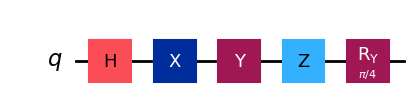

In [107]:
qc = QuantumCircuit(q_reg)
qc.h(q_reg)
qc.x(q_reg)
qc.y(q_reg)
qc.z(q_reg)

theta = np.pi/4
qc.ry(theta, q_reg) # y axis rotation
qc.draw(output = 'mpl')

In [108]:
shots = 2**14

uncertainity = 0
for measure_circuit in [measure_z, measure_x]:
    result = Aer.get_backend('qasm_simulator').run(measure_circuit, shots=shots).result()
    counts = result.get_counts(measure_circuit)
    probs = {}
    for output in ['0', '1']:
        if output in counts:
            probs[output] = counts[output] / shots
        else:
            probs[output] = 0
    uncertainity += (probs.get('0', 0) - probs.get('1', 0))**2
print(uncertainity)

1.0000072121620178


What is (probs['0'] - probs['1'])? 

For a single qubit: 

    probs['0'] + probs['1'] = 1
    So: probs['0'] - probs['1'] = 2*probs['0'] - 1 = expectation value of Pauli Z (or X)
     

Let’s define: 

    For Z measurement: ⟨Z⟩ = P(0) - P(1)
    For X measurement: ⟨X⟩ = P(0) - P(1) in X-basis
     

uncertainity = ⟨Z⟩² + ⟨X⟩²

Now, for a qubit state, what is the maximum of ⟨Z⟩² + ⟨X⟩²? 

Recall: For a single qubit, the Bloch vector has components: 

    ⟨X⟩² + ⟨Y⟩² + ⟨Z⟩² ≤ 1 (equality for pure states)
     

So: 

    ⟨Z⟩² + ⟨X⟩² ≤ 1
     

Wait — that suggests it should not exceed 1! 

But here's the catch: Are you measuring the same qubit in both bases, on the same state? 

For a single qubit measurement: 

    If you measure in the Z basis: 
        P(0) = probability of outcome |0⟩
        P(1) = probability of outcome |1⟩

        The expectation value of Z is:  
        ⟨Z⟩=(+1)⋅P(0)+(−1)⋅P(1)=P(0)−P(1) 
         

    Similarly, in the X basis: 
        P(0) = probability of outcome |+⟩
        P(1) = probability of outcome |-⟩
         
        ⟨X⟩=P(0)−P(1)(in X-basis) 
         

         
But Why Square the Difference? Why Not Something Else? 

Because in quantum mechanics, the expectation value is defined as: 
 
⟨O⟩=outcomes∑​(outcome value)×P(outcome) 

For Pauli operators, the outcomes are +1 and -1, so: 

    For Z: +1 for |0⟩, -1 for |1⟩
    So: ⟨Z⟩ = (+1)·P(0) + (-1)·P(1) = P(0) - P(1)
     

Then ⟨Z⟩² = (P(0) - P(1))² 

Same for X. 

So squaring the difference is how you get ⟨Z⟩². There's no other way. 

There are infinitely many ways to mesure a qubit, but the z and x measurements have a special relationship with other. We can say that they are mutually unbiased. 

This means that certainity for one implies complete randomness for the other

In [109]:
measure_y = QuantumCircuit(q_reg, c_reg)
measure_y.sdg(q_reg)
measure_y.h(q_reg)
measure_y.measure(q_reg, c_reg)

In [113]:
shots = 2**14

uncertainity = 0
for measure_circuit in [measure_x, measure_y, measure_z]:
    result = Aer.get_backend('qasm_simulator').run(measure_circuit, shots=shots).result()
    counts = result.get_counts(measure_circuit)
    probs = {}
    for output in ['0', '1']:
        if output in counts:
            probs[output] = counts[output] / shots
        else:
            probs[output] = 0
    uncertainity += (probs.get('0', 0) - probs.get('1', 0))**2
print(uncertainity)

1.000140219926834


The fact that certainty is conserved remains true, but it can only be seen when
looking at all the qubits together.

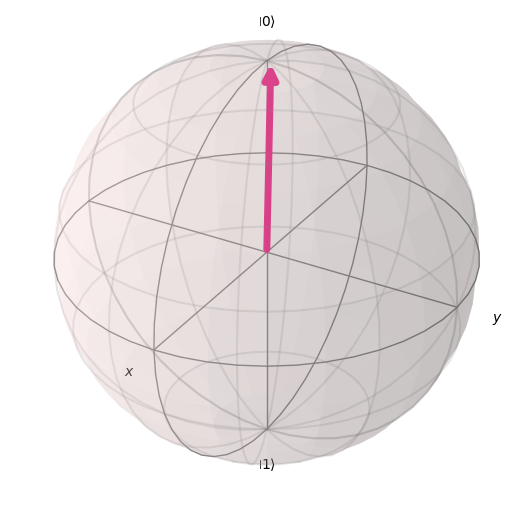

In [112]:
shots = 2**14

bloch_vector = []
uncertainity = 0
for measure_circuit in [measure_x, measure_y,measure_z]:
    result = Aer.get_backend('qasm_simulator').run(measure_circuit, shots=shots).result()
    counts = result.get_counts(measure_circuit)
    probs = {}
    for output in ['0', '1']:
        if output in counts:
            probs[output] = counts[output] / shots
        else:
            probs[output] = 0
            
    bloch_vector.append(probs['0'] - probs['1'])


plot_bloch_vector(bloch_vector)


We'll walk through each part.

---

### ✅ Step 1: `shots = 2**14`

```python
shots = 16384
```

- This sets the number of times each quantum circuit will be run.
- More shots → better statistics → more accurate probability estimates.
- `2**14 = 16384` is a good balance between accuracy and speed.

🟢 **Purpose**: Number of measurement repetitions.

---

### ✅ Step 2: `bloch_vector = []`

- Initializes an empty list that will store the **components of the Bloch vector**: $ \langle X \rangle, \langle Y \rangle, \langle Z \rangle $
- Will eventually become: `[⟨X⟩, ⟨Y⟩, ⟨Z⟩]`

🟢 **Purpose**: To collect the expectation values.

---

### ✅ Step 3: `uncertainity = 0` (Note: typo in spelling)

- You define a variable `uncertainity` but **never use it**.
- This line has **no effect** on the output.
- It's dead code — you can safely remove it.

🟡 **Note**: Spelling: should be `uncertainty`, but since it's unused, doesn’t matter.

---

### ✅ Step 4: Loop over measurement circuits

```python
for measure_circuit in [measure_x, measure_y, measure_z]:
```

You're now looping through the three circuits in this exact order:
1. `measure_x` → measures in **X basis**
2. `measure_y` → measures in **Y basis**
3. `measure_z` → measures in **Z basis**

✅ This is crucial — because you're appending results in this order, your final list will be:
```python
bloch_vector = [⟨X⟩, ⟨Y⟩, ⟨Z⟩]
```

And that’s **exactly** what `plot_bloch_vector()` expects!

🟢 **Good**: Correct order for plotting.

---

### ✅ Step 5: Run the circuit on the simulator

```python
result = Aer.get_backend('qasm_simulator').run(measure_circuit, shots=shots).result()
```

- Uses Qiskit’s `qasm_simulator` to simulate a real quantum device.
- Runs the current measurement circuit (`measure_x`, then `measure_y`, then `measure_z`) with `16384` shots.
- Returns a `Result` object containing the counts (how many times each outcome occurred).

🟢 **Purpose**: Simulate measurement in one basis.

---

### ✅ Step 6: Get the counts

```python
counts = result.get_counts(measure_circuit)
```

- `counts` is a dictionary like:
  ```python
  {'0': 8200, '1': 8184}
  ```
- These are the number of times `'0'` and `'1'` were measured.

🟢 **Purpose**: Get raw measurement outcomes.

---

### ✅ Step 7: Convert counts to probabilities

```python
probs = {}
for output in ['0', '1']:
    if output in counts:
        probs[output] = counts[output] / shots
    else:
        probs[output] = 0
```

- Converts raw counts into probabilities:
  - `probs['0'] = P(0)`
  - `probs['1'] = P(1)`
- If an outcome didn’t occur (e.g., no `'1'` results), sets its probability to 0.

🟢 **Purpose**: Estimate $P(0)$ and $P(1)$ from data.

---

### ✅ Step 8: Compute expectation value

```python
probs['0'] - probs['1']
```

This is the **expectation value** of the observable (X, Y, or Z):

$$
\langle O \rangle = (+1) \cdot P(0) + (-1) \cdot P(1) = P(0) - P(1)
$$

Because:
- In quantum computing, measurement outcomes are mapped as:
  - `'0'` → eigenvalue +1
  - `'1'` → eigenvalue -1

So:
- For `measure_z`: this gives $ \langle Z \rangle $
- For `measure_x`: this gives $ \langle X \rangle $
- For `measure_y`: this gives $ \langle Y \rangle $

🟢 **Purpose**: Compute $ \langle X \rangle $, $ \langle Y \rangle $, $ \langle Z \rangle $

---

### ✅ Step 9: Append to `bloch_vector`

```python
bloch_vector.append(probs['0'] - probs['1'])
```

Now:
- After first loop (X): `bloch_vector = [⟨X⟩]`
- After second (Y): `bloch_vector = [⟨X⟩, ⟨Y⟩]`
- After third (Z): `bloch_vector = [⟨X⟩, ⟨Y⟩, ⟨Z⟩]`

✅ This is the **correct order** for the Bloch vector.

---

### ✅ Step 10: Plot the Bloch vector

```python
plot_bloch_vector(bloch_vector)
```

- This function (from `qiskit.visualization`) draws a 3D Bloch sphere.
- It expects a list: `[x, y, z]` = `[⟨X⟩, ⟨Y⟩, ⟨Z⟩]`
- It draws an arrow from the origin to that point.

🟢 **Now correct**: You are passing `[⟨X⟩, ⟨Y⟩, ⟨Z⟩]` in the right order.

---

### 🎯 What Should the Result Be?

You are measuring the **default state**: $|0\rangle$

Let’s compute expected values:

| Observable | $P(0)$ | $P(1)$ | $ \langle O \rangle = P(0) - P(1) $ |
|----------|--------|--------|-------------------------------|
| **Z**    | 1.0    | 0.0    | $1.0$ |
| **X**    | 0.5    | 0.5    | $0.0$ |
| **Y**    | 0.5    | 0.5    | $0.0$ |

So:
- $ \langle X \rangle \approx 0 $
- $ \langle Y \rangle \approx 0 $
- $ \langle Z \rangle \approx 1 $

Therefore:
```python
bloch_vector ≈ [0, 0, 1]
```

👉 This is the **north pole** of the Bloch sphere — the **$|0\rangle$ direction**

🟢 So the arrow should point **straight up** along the **Z-axis**

---

### 🔍 Why Was It Pointing Along X Before?

Earlier, you had the order:
```python
[measure_z, measure_x, measure_y]
```

So you passed:
```python
bloch_vector = [⟨Z⟩, ⟨X⟩, ⟨Y⟩] ≈ [1, 0, 0]
```

But `plot_bloch_vector()` interpreted it as:
- X = 1
- Y = 0
- Z = 0

→ So it drew the vector along **+X**

Now you fixed it by changing the loop order — **great job!**

---

### ✅ Final Output

Your corrected code will:
1. Estimate $ \langle X \rangle, \langle Y \rangle, \langle Z \rangle $ from measurements
2. Store them in order: `[⟨X⟩, ⟨Y⟩, ⟨Z⟩]`
3. Plot a vector at approximately `[0, 0, 1]`
4. Show an arrow pointing **up** — the **$|0\rangle$ direction**

---

### 📌 Summary: Step-by-Step Breakdown

| Line(s) | What It Does | Why It Matters |
|--------|--------------|---------------|
| `shots = 2**14` | Sets number of runs per circuit | Better statistics |
| `bloch_vector = []` | Initializes list for vector components | Will hold ⟨X⟩, ⟨Y⟩, ⟨Z⟩ |
| `for measure_circuit in [measure_x, measure_y, measure_z]` | Loop in correct order | Ensures final list is `[⟨X⟩, ⟨Y⟩, ⟨Z⟩]` |
| `run(...)` | Simulates circuit | Gets measurement outcomes |
| `get_counts()` | Gets how many times '0' and '1' occurred | Raw data |
| `probs[...] = count/shots` | Converts to probabilities | Needed for expectation |
| `probs['0'] - probs['1']` | Computes $ \langle O \rangle $ | This is the expectation value |
| `append(...)` | Adds component to list | Builds Bloch vector |
| `plot_bloch_vector(...)` | Draws vector on Bloch sphere | Visualizes quantum state |
